## Копипаста с Kagle

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('HappinessAlcoholConsumption.csv')
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [3]:
print(data.Hemisphere.value_counts())

north    92
south    21
both      5
noth      4
Name: Hemisphere, dtype: int64


In [4]:
data.Hemisphere = data.Hemisphere.replace(('both','noth'), 'south')

In [5]:
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [6]:
print(data.Hemisphere.value_counts())

north    92
south    30
Name: Hemisphere, dtype: int64


In [7]:
data['SumAl_PerCapita'] = data['Beer_PerCapita'] + data['Spirit_PerCapita'] + data['Wine_PerCapita']

In [8]:
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,SumAl_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


In [9]:
north_hemisphere = data[data.Hemisphere == "north"]
south_hemisphere = data[data.Hemisphere == "south"]

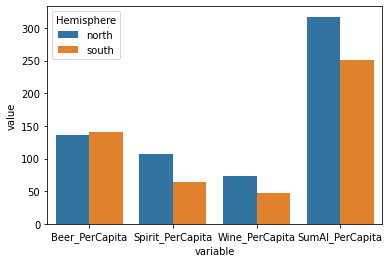

In [10]:

north_mean_consumption = north_hemisphere.drop(['HappinessScore','HDI','GDP_PerCapita'], axis=1).mean()
north_mean_consumption['Hemisphere'] = 'north'
south_mean_consumption = south_hemisphere.drop(['HappinessScore','HDI','GDP_PerCapita'], axis=1).mean()
south_mean_consumption['Hemisphere'] = 'south'

means = pd.DataFrame(data = [north_mean_consumption, south_mean_consumption])
melted = pd.melt(means, id_vars = ['Hemisphere'], value_vars = ['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita', 'SumAl_PerCapita'])
#display(melted)

sns.barplot(x = 'variable', y='value', hue = 'Hemisphere', data = melted);

# Пора определиться, что будет в исследовании:
1. Хочу посмотреть, насколько связано кол-во выпитого алкоголя и счастья с поправкой на HDI и CDGP отдельно
2. В описательных статистиках надо показать сколько бухают, показать где и сколько бухают и показать уровни стран, наверн что-то такое

# Количество потребляемого алкоголя в литрах в зависимости от страны

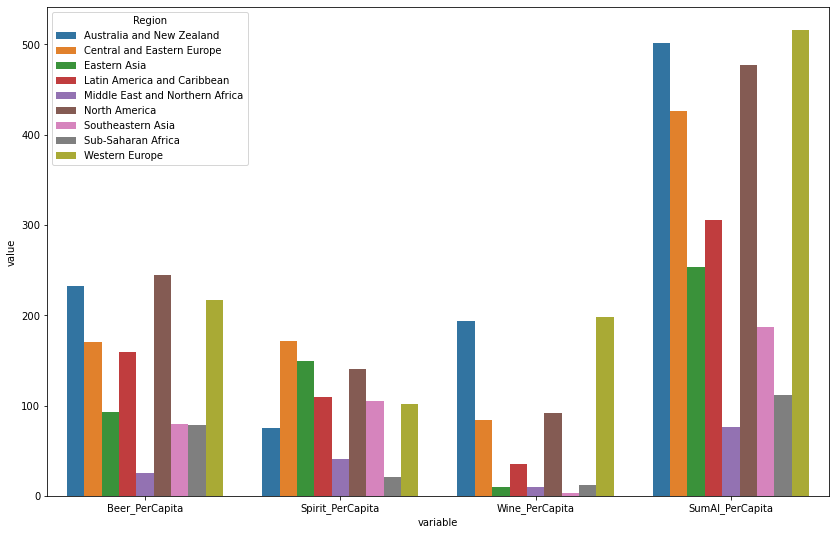

In [11]:
means_r = data.drop(['HappinessScore','HDI','GDP_PerCapita'], axis=1).groupby(by = 'Region').mean().reset_index()
melted = pd.melt(means_r, id_vars = ['Region'], value_vars = ['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita','SumAl_PerCapita'])

plt.figure(figsize=(14,9))
sns.barplot(x = 'variable', y='value', hue = 'Region', data = melted);

# Посмотрим на уровень счастья и (ВВП + Индекс человеческого развития)

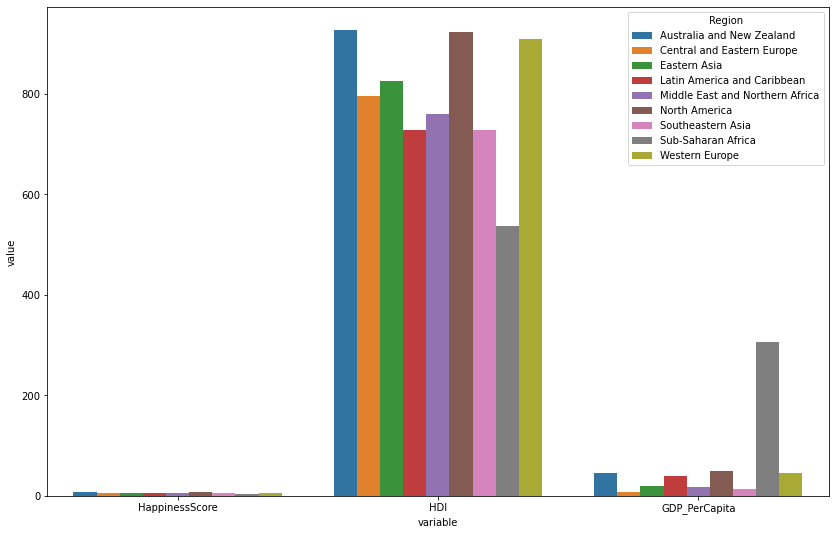

In [12]:
means_re = data.drop(['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita','SumAl_PerCapita'], axis=1).groupby(by = 'Region').mean().reset_index()
melted = pd.melt(means_re, id_vars = ['Region'], value_vars = ['HappinessScore', 'HDI','GDP_PerCapita'])
#Здесь mean_re - среднее по регионам по экономическим показателям
plt.figure(figsize=(14,9))
sns.barplot(x = 'variable', y='value', hue = 'Region', data = melted);

In [13]:
means_re['HDI'] = means_re['HDI'] / max(means_re['HDI']) * 10
means_re['GDP_PerCapita'] = means_re['GDP_PerCapita'] / max(means_re['GDP_PerCapita']) * 10

# Отнормируем на максимальный элемент ВВП и Индекс человеческого развития, чтобы было удобно смотреть на 10-бальной шкале

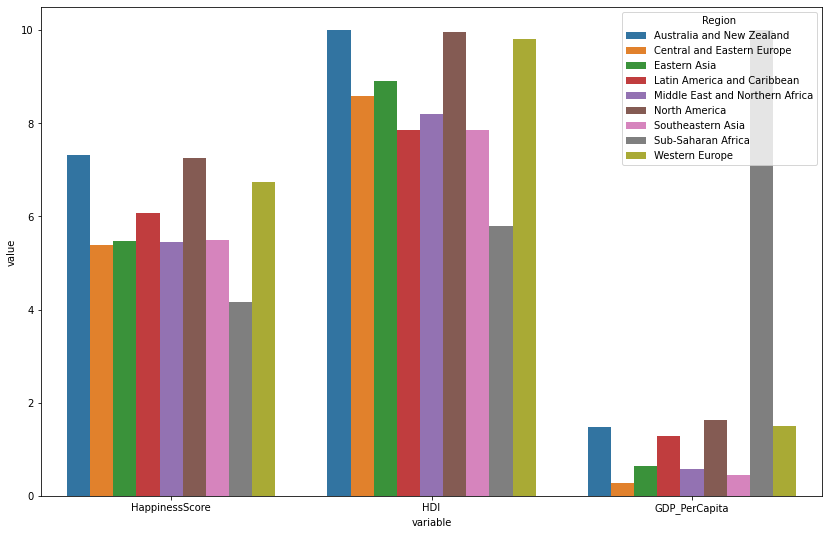

In [14]:
melted = pd.melt(means_re, id_vars = ['Region'], value_vars = ['HappinessScore', 'HDI','GDP_PerCapita'])

plt.figure(figsize=(14,9))
sns.barplot(x = 'variable', y='value', hue = 'Region', data = melted);

1. Сильно вырывается по ВВП Африка к Югу от Сурухана, при том не сильно-то они там счастливы...
2. Значит стоит глянуть: может недостаточно пьют, потому и грустят?

# Насколько кореллирует кол-во выпитого и уровень счастья?

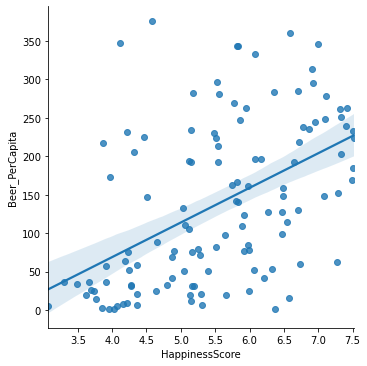

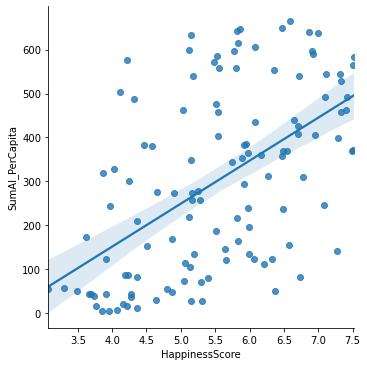

In [15]:
sns.lmplot(x = 'HappinessScore', y = 'Beer_PerCapita', data = data);
sns.lmplot(x = 'HappinessScore', y = 'SumAl_PerCapita', data = data);
#sns.jointplot(x = 'HappinessScore', y = 'SumAl_PerCapita', data = data);

## Boxplot для всего, что вижу, дальше разберемся

<AxesSubplot:>

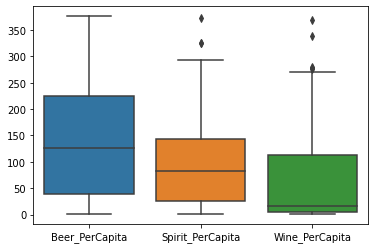

In [135]:
#По странам (водка-пиво) {усреднение}
sns.boxplot(data = data.drop(['Region', 'HappinessScore', 'HDI', 'GDP_PerCapita', 
                              'SumAl_PerCapita'], axis = 1))

<AxesSubplot:>

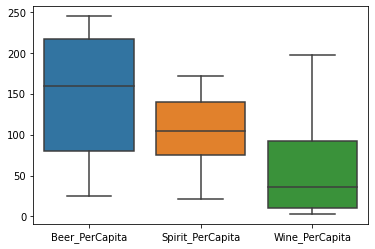

In [136]:
#По регионам (водка-пиво){усреднение}
sns.boxplot(data = data.drop(['HappinessScore', 'HDI', 'GDP_PerCapita', 
                              'SumAl_PerCapita'], axis = 1).groupby(by = 'Region').mean().reset_index())

<AxesSubplot:>

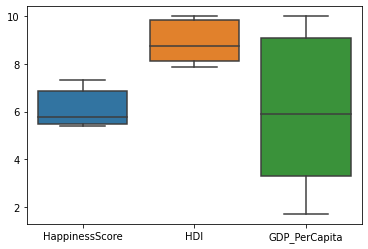

In [52]:
#Среднее по регионам (ВВП и тд)
sns.boxplot(data = means_re)

<AxesSubplot:>

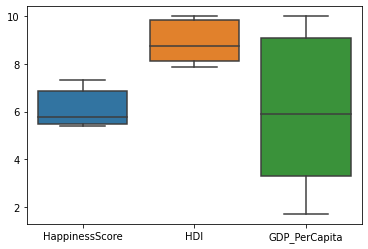

In [54]:
#Выкинул выброс
means_re = means_re.loc[means_re['Region'] != 'Sub-Saharan Africa']
means_re['GDP_PerCapita'] = means_re['GDP_PerCapita'] / max(means_re['GDP_PerCapita']) * 10
sns.boxplot(data = means_re)

<AxesSubplot:>

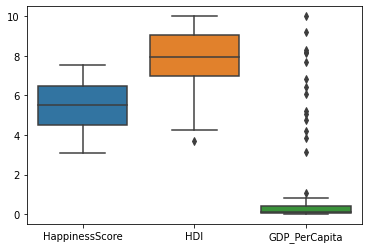

In [137]:
#Среднее по странам (ВВП и тд)
means_c = data.drop(['Beer_PerCapita','Spirit_PerCapita', 
                     'Wine_PerCapita','SumAl_PerCapita'], axis=1)
means_c['HDI'] = means_c['HDI'] / max(means_c['HDI']) * 10
means_c['GDP_PerCapita'] = means_c['GDP_PerCapita'] / max(means_c['GDP_PerCapita']) * 10
sns.boxplot(data = means_c)

# Видно что с GDP по странам что-то не так, давайте глянем:

In [138]:
means_cc = means_c.loc[means_c['GDP_PerCapita'] > 2 * np.mean(means_c['GDP_PerCapita'])] #clever
means_cs = means_c.loc[means_c['GDP_PerCapita'] <= 2 * np.mean(means_c['GDP_PerCapita'])] #stupid

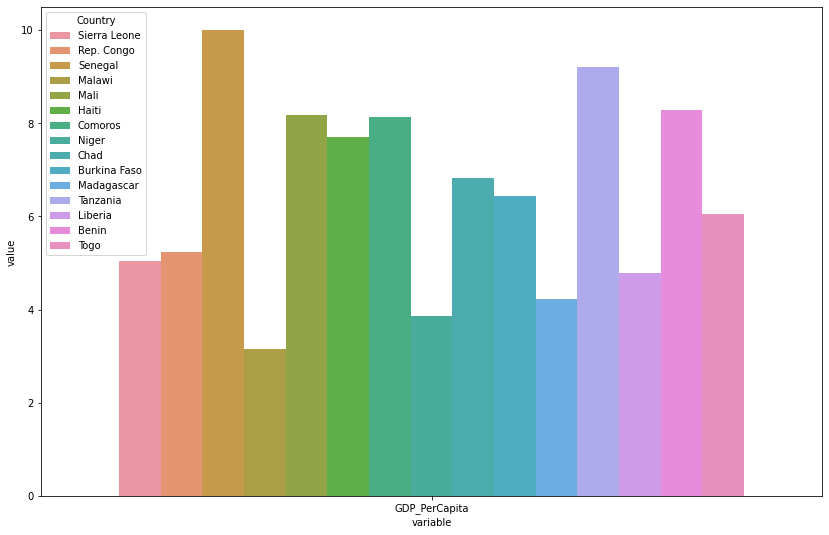

In [147]:
#Что там у богатых
melted = pd.melt(means_cc, id_vars = ['Country'], value_vars = ['GDP_PerCapita'])
plt.figure(figsize=(14,9))
sns.barplot(x = 'variable', y='value', hue = 'Country', data = melted);
#sns.boxplot(data = means_cc)

In [146]:
means_cc

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita
89,Sierra Leone,Sub-Saharan Africa,north,4.635,4.342797,5.047219
100,Rep. Congo,Sub-Saharan Africa,south,4.236,6.435331,5.225603
101,Senegal,Sub-Saharan Africa,north,4.219,5.247108,10.000000
104,Malawi,Sub-Saharan Africa,south,4.156,4.984227,3.147954
106,Mali,Sub-Saharan Africa,north,4.073,4.426919,8.184680
107,Haiti,Latin America and Caribbean,north,4.028,5.215563,7.712487
109,Comoros,Sub-Saharan Africa,south,3.956,5.278654,8.132214
113,Niger,Sub-Saharan Africa,north,3.856,3.690852,3.861490
114,Chad,Sub-Saharan Africa,north,3.763,4.258675,6.831060
115,Burkina Faso,Sub-Saharan Africa,north,3.739,4.416404,6.442812


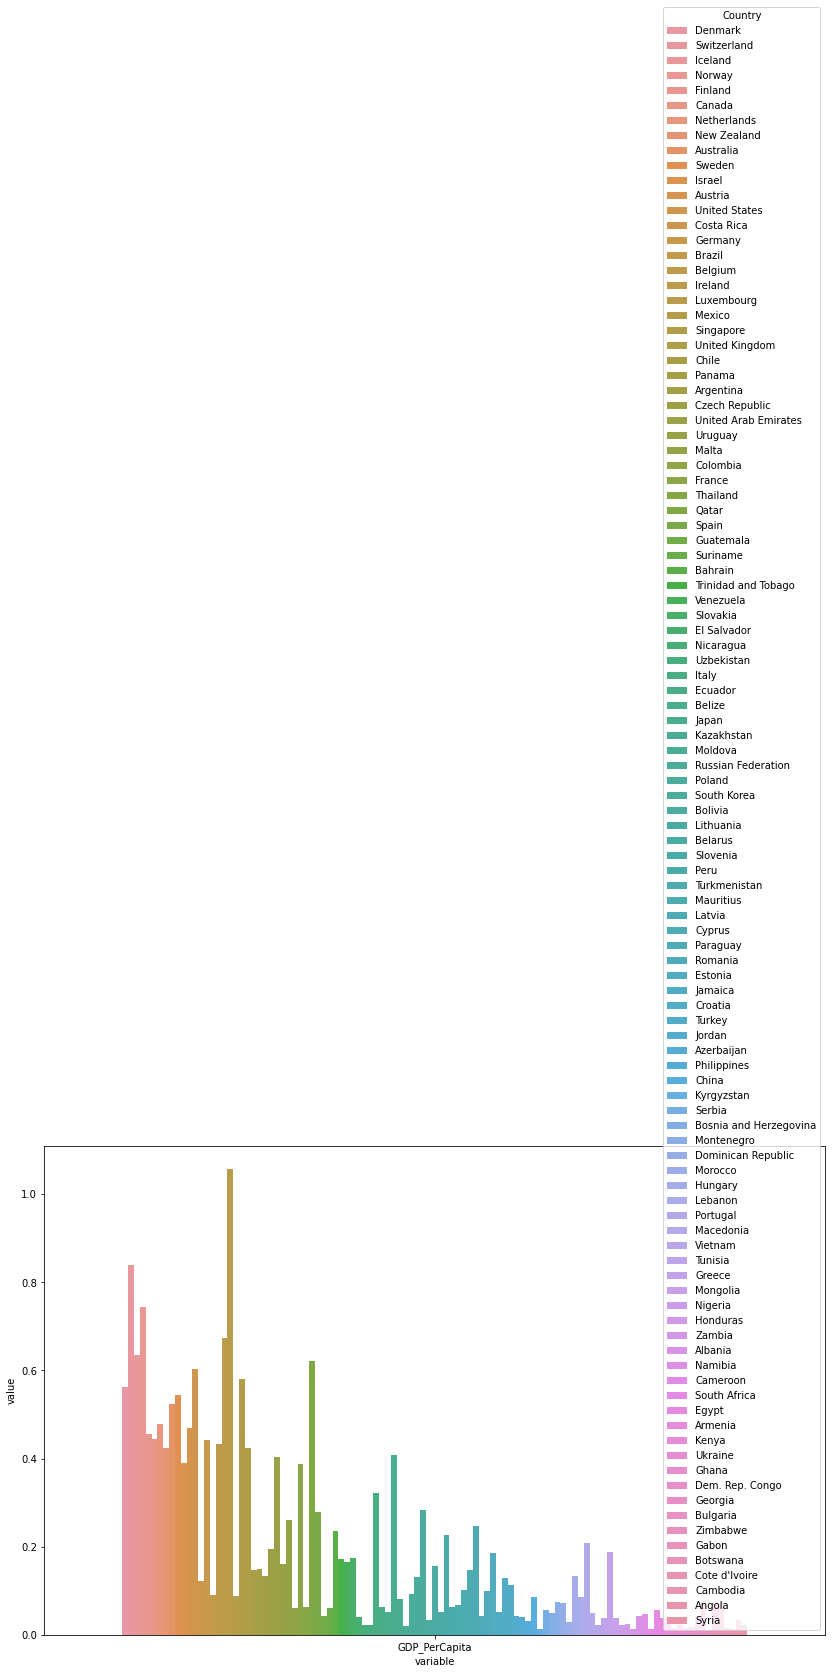

In [144]:
#Что там у небогатых
melted = pd.melt(means_cs, id_vars = ['Country'], value_vars = ['GDP_PerCapita'])
plt.figure(figsize=(14,9))
sns.barplot(x = 'variable', y='value', hue = 'Country', data = melted);
#sns.boxplot(data = means_cs)
#sns.boxplot(data = means_cs['GDP_PerCapita'])

<AxesSubplot:>

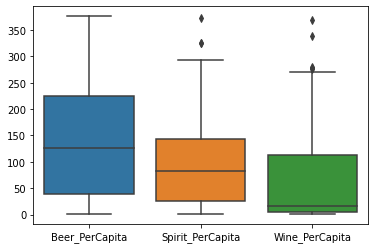

In [111]:
sns.boxplot(data = data.drop(['HappinessScore', 'HDI', 'GDP_PerCapita', 'SumAl_PerCapita'], axis = 1))

# Кластеризация